In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

# open all the yellow and green taxi file and save them into dataframe

In [2]:
raw = pd.DataFrame()
combine_raw = pd.DataFrame()
for year in range(2022, 2024):
    for month in range(1, 13):
        # Make sure the month is two digits
        month = str(month).zfill(2)
        
        yellow_file_name = f'yellow_tripdata_{year}-{month}.parquet'
        print(yellow_file_name)
        
        try:
            raw_yellow_partition = pq.read_table(yellow_file_name)
            raw_yellow_partition = raw_yellow_partition.to_pandas()[['tpep_pickup_datetime','tpep_dropoff_datetime',
                                                    'passenger_count','PULocationID','DOLocationID']]
        except Exception as e:
                print(f"Could not read file: {yellow_file_name}. Error: {e}")
                
                
        green_file_name = f'green_tripdata_{year}-{month}.parquet'
        print(green_file_name)
        
        try:
            raw_green_partition = pq.read_table(green_file_name)
            raw_green_partition = raw_green_partition.to_pandas()[['lpep_pickup_datetime','lpep_dropoff_datetime',
                                                    'passenger_count','PULocationID','DOLocationID']]

            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_pickup_datetime', 'tpep_pickup_datetime')
            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_dropoff_datetime', 'tpep_dropoff_datetime')
        except Exception as e:
                print(f"Could not read file: {green_file_name}. Error: {e}")
        
        raw = pd.concat([raw,raw_yellow_partition, raw_green_partition],axis=0)

#         raw = pd.concat([raw,raw_green_partition],axis=0)

#         raw = pd.concat([raw,raw_yellow_partition],axis=0)
raw.shape

yellow_tripdata_2022-01.parquet
green_tripdata_2022-01.parquet
yellow_tripdata_2022-02.parquet
green_tripdata_2022-02.parquet
yellow_tripdata_2022-03.parquet
green_tripdata_2022-03.parquet
yellow_tripdata_2022-04.parquet
green_tripdata_2022-04.parquet
yellow_tripdata_2022-05.parquet
green_tripdata_2022-05.parquet
yellow_tripdata_2022-06.parquet
green_tripdata_2022-06.parquet
yellow_tripdata_2022-07.parquet
green_tripdata_2022-07.parquet
yellow_tripdata_2022-08.parquet
green_tripdata_2022-08.parquet
yellow_tripdata_2022-09.parquet
green_tripdata_2022-09.parquet
yellow_tripdata_2022-10.parquet
green_tripdata_2022-10.parquet
yellow_tripdata_2022-11.parquet
green_tripdata_2022-11.parquet
yellow_tripdata_2022-12.parquet
green_tripdata_2022-12.parquet
yellow_tripdata_2023-01.parquet
green_tripdata_2023-01.parquet
yellow_tripdata_2023-02.parquet
green_tripdata_2023-02.parquet
yellow_tripdata_2023-03.parquet
green_tripdata_2023-03.parquet
yellow_tripdata_2023-04.parquet
green_tripdata_2023-04.

(80268829, 5)

In [3]:
raw

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0      2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1      2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2      2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3      2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4      2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...                    ...                   ...              ...   
65387  2023-04-30 22:02:00   2023-04-30 22:12:00              NaN   
65388  2023-04-30 23:16:00   2023-04-30 23:43:00              NaN   
65389  2023-04-30 23:25:00   2023-04-30 23:40:00              NaN   
65390  2023-04-30 23:36:00   2023-04-30 23:57:00              NaN   
65391  2023-04-30 23:24:00   2023-04-30 23:44:00              NaN   

       PULocationID  DOLocationID  
0               142           236  
1               236            42  
2               166           166  
3               114            68  
4                68           163  
...             ...           ...  
65387            42           168  
65388           130           170  
65389            36           112  
65390           112           236  
65391            80            74  

[80268829 rows x 5 columns]

# clean duplicated rows

In [4]:
# clean duplicated rows
print('Number of duplicate (excluding original) rows is:', raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', raw[raw.duplicated(keep=False)].shape[0])
# Show duplicate row data that can be dropped
raw[raw.duplicated(keep=False)]


Number of duplicate (excluding original) rows is: 27153047
Number of duplicate rows (including first) in the table is: 30777201


tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
154    2022-01-01 00:26:37   2022-01-01 00:39:35              1.0   
155    2022-01-01 00:26:37   2022-01-01 00:39:35              1.0   
521    2022-01-01 00:27:18   2022-01-01 00:40:50              1.0   
522    2022-01-01 00:27:18   2022-01-01 00:40:50              1.0   
523    2022-01-01 00:59:33   2022-01-01 01:14:09              4.0   
...                    ...                   ...              ...   
65387  2023-04-30 22:02:00   2023-04-30 22:12:00              NaN   
65388  2023-04-30 23:16:00   2023-04-30 23:43:00              NaN   
65389  2023-04-30 23:25:00   2023-04-30 23:40:00              NaN   
65390  2023-04-30 23:36:00   2023-04-30 23:57:00              NaN   
65391  2023-04-30 23:24:00   2023-04-30 23:44:00              NaN   

       PULocationID  DOLocationID  
154             132           265  
155             132           265  
521             152            48  
522             152            48  
523              50           265  
...             ...           ...  
65387            42           168  
65388           130           170  
65389            36           112  
65390           112           236  
65391            80            74  

[30777201 rows x 5 columns]

In [5]:
raw = raw.drop_duplicates()
print('Number of duplicate (excluding original) rows is:', raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', raw[raw.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


# combine the pickup and dropoff data together

In [6]:
raw_pickup = raw[['tpep_pickup_datetime',
                                            'passenger_count','PULocationID']]
raw_pickup = raw_pickup.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')

raw_dropoff = raw[['tpep_dropoff_datetime',
                                            'passenger_count','DOLocationID']]
raw_dropoff = raw_dropoff.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')


combine_raw = pd.concat([raw_pickup,raw_dropoff],axis=0)
combine_raw

datetime  passenger_count  taxi_zone
0     2022-01-01 00:35:40              2.0        142
1     2022-01-01 00:33:43              1.0        236
2     2022-01-01 00:53:21              1.0        166
3     2022-01-01 00:25:21              1.0        114
4     2022-01-01 00:36:48              1.0         68
...                   ...              ...        ...
65387 2023-04-30 22:12:00              NaN        168
65388 2023-04-30 23:43:00              NaN        170
65389 2023-04-30 23:40:00              NaN        112
65390 2023-04-30 23:57:00              NaN        236
65391 2023-04-30 23:44:00              NaN         74

[106231564 rows x 3 columns]

# check special value for each feature

In [7]:
 # check null value
combine_raw.isnull().sum()

datetime                 0
passenger_count    3607292
taxi_zone                0
dtype: int64

In [8]:
# show date types
combine_raw.dtypes

datetime           datetime64[ns]
passenger_count           float64
taxi_zone                   int64
dtype: object

In [9]:
#update all columns of type 'numeric'
numeric_columns = combine_raw.select_dtypes(['float64']).columns
numeric_columns

Index(['passenger_count'], dtype='object')

In [10]:
# Prepare %missing column
numeric_columns_missing  = 100 * (combine_raw[numeric_columns].isnull().sum()/combine_raw.shape[0])
# store the values in a dataframe
new_df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
new_df_numeric_missing

%missing
passenger_count  3.395688

In [11]:
# Add cardinality column
numeric_columns_card = combine_raw[numeric_columns].nunique()
# store the values in a dataframe
new_df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
new_df_numeric_card

card
passenger_count    10

In [12]:
# Add missing values column
new_df_table_numeric = combine_raw[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
# In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.
df_numeric_columns_data_quality_report_table = pd.concat([new_df_table_numeric, new_df_numeric_missing, new_df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table

count      mean       std  min  25%  50%  75%  max  \
passenger_count  102624272.0  1.389955  0.947469  0.0  1.0  1.0  1.0  9.0   

                 %missing  card  
passenger_count  3.395688    10

In [13]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (combine_raw[feature].max() - combine_raw[feature].min()))
    
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    # nlargest decide how many values show here. the code show top 15 values.
    print(combine_raw[feature].value_counts().nlargest(15), "\n\n\n")

passenger_count
----------

Range passenger_count is:  9.0
----------
Value  Number of Instances
passenger_count
1.0    76388348
2.0    15466896
3.0     3993620
0.0     1964598
4.0     1885114
5.0     1756854
6.0     1167440
7.0         632
8.0         572
9.0         198
Name: count, dtype: int64 





# Extract year and month

In [14]:
# Extract year and month
combine_raw['year_month'] = combine_raw['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
combine_raw['day'] = combine_raw['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
combine_raw['week'] = combine_raw['datetime'].dt.dayofweek

# Extract hour of the day
combine_raw['hour'] = combine_raw['datetime'].dt.hour

# days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
# combine_raw['week'] = combine_raw['week'].apply(lambda x: days[x])



In [15]:
combine_raw

datetime  passenger_count  taxi_zone year_month  day  week  \
0     2022-01-01 00:35:40              2.0        142    2022-01    1     5   
1     2022-01-01 00:33:43              1.0        236    2022-01    1     5   
2     2022-01-01 00:53:21              1.0        166    2022-01    1     5   
3     2022-01-01 00:25:21              1.0        114    2022-01    1     5   
4     2022-01-01 00:36:48              1.0         68    2022-01    1     5   
...                   ...              ...        ...        ...  ...   ...   
65387 2023-04-30 22:12:00              NaN        168    2023-04   30     6   
65388 2023-04-30 23:43:00              NaN        170    2023-04   30     6   
65389 2023-04-30 23:40:00              NaN        112    2023-04   30     6   
65390 2023-04-30 23:57:00              NaN        236    2023-04   30     6   
65391 2023-04-30 23:44:00              NaN         74    2023-04   30     6   

       hour  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
65387    22  
65388    23  
65389    23  
65390    23  
65391    23  

[106231564 rows x 7 columns]

In [16]:
# set categorical types
combine_raw['taxi_zone'] = combine_raw['taxi_zone'].astype('category')
combine_raw['year_month'] = combine_raw['year_month'].astype('category')
combine_raw['day'] = combine_raw['day'].astype('category')
combine_raw['week'] = combine_raw['week'].astype('category')
combine_raw['hour'] = combine_raw['hour'].astype('category')
category_columns = combine_raw.select_dtypes(['category']).columns
category_columns

Index(['taxi_zone', 'year_month', 'day', 'week', 'hour'], dtype='object')

In [17]:
combine_raw[category_columns].describe().T

count unique      top      freq
taxi_zone   106231564    263      237   4584018
year_month  106231564     27  2022-10   7443845
day         106231564     31       14   3657504
week        106231564      7        3  16457262
hour        106231564     24       18   7630346

In [18]:
print("taxi_zone: ", combine_raw['taxi_zone'].unique().tolist(), "\n")
print("year_month: ", combine_raw['year_month'].unique().tolist(), "\n")
print("day: ", combine_raw['day'].unique().tolist(), "\n")
print("week: ", combine_raw['week'].unique().tolist(), "\n")
print("hour: ", combine_raw['hour'].unique().tolist(), "\n")

taxi_zone:  [142, 236, 166, 114, 68, 138, 233, 238, 141, 234, 246, 43, 239, 148, 237, 7, 107, 263, 161, 79, 170, 162, 4, 262, 249, 132, 137, 90, 45, 70, 48, 211, 113, 164, 50, 265, 88, 186, 144, 224, 95, 24, 158, 74, 140, 163, 75, 229, 209, 264, 219, 232, 151, 256, 231, 87, 116, 65, 188, 42, 13, 33, 41, 220, 146, 100, 261, 125, 152, 127, 143, 243, 66, 260, 181, 195, 112, 129, 10, 226, 25, 255, 244, 12, 168, 230, 189, 97, 82, 190, 52, 49, 61, 145, 223, 202, 228, 179, 36, 40, 159, 80, 17, 167, 208, 69, 254, 213, 193, 77, 37, 225, 171, 106, 93, 247, 165, 117, 212, 250, 14, 157, 198, 83, 169, 136, 217, 173, 123, 160, 3, 1, 76, 89, 22, 39, 86, 18, 28, 252, 227, 135, 91, 124, 38, 216, 119, 205, 81, 122, 194, 92, 133, 35, 134, 177, 215, 147, 248, 63, 47, 210, 197, 201, 131, 200, 56, 5, 130, 191, 85, 218, 51, 46, 149, 241, 139, 235, 71, 102, 62, 174, 72, 182, 11, 29, 183, 67, 155, 54, 196, 8, 175, 55, 53, 64, 180, 34, 60, 120, 44, 257, 78, 207, 242, 184, 153, 185, 15, 19, 26, 258, 121, 57, 203

In [19]:
for feature in category_columns:
    
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    # nlargest decide how many values show here. the code show top 15 values.
#     print(combine_raw[feature].value_counts().nlargest(15), "\n\n\n")
    print(combine_raw[feature].value_counts().nlargest(250), "\n\n\n")

----------
Value  Number of Instances
taxi_zone
237    4584018
236    4493612
161    4067210
132    3206610
230    3173916
        ...   
251        867
156        813
245        682
172        654
109        614
Name: count, Length: 250, dtype: int64 



----------
Value  Number of Instances
year_month
2022-10    7443845
2022-03    7376674
2022-04    7316875
2022-05    7294463
2022-06    7221825
2023-03    6897255
2022-12    6896177
2023-04    6654896
2022-11    6586270
2022-09    6466728
2022-07    6439575
2022-08    6397156
2023-01    6225586
2022-02    6069670
2023-02    5913524
2022-01    5029155
2023-05        877
2002-10        718
2009-01        130
2008-12         60
2021-12         41
2003-01         28
2001-01         22
2002-12          8
2001-08          2
2014-11          2
2012-02          2
Name: count, dtype: int64 



----------
Value  Number of Instances
day
14    3657504
15    3649686
12    3626068
8     3621002
13    3619171
11    3606078
9     3586193
19    355959

In [20]:
 # check null value
combine_raw.isnull().sum()

datetime                 0
passenger_count    3607292
taxi_zone                0
year_month               0
day                      0
week                     0
hour                     0
dtype: int64

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

<Figure size 640x480 with 0 Axes>

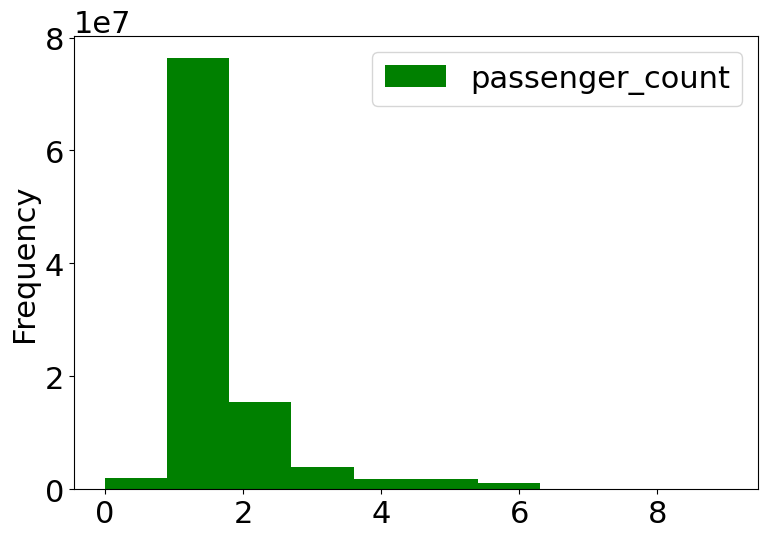

In [21]:
#Plot histograms of the continuous feature case_positive_specimen_interval and case_onset_interval
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
combine_raw[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,20), layout=(3,3), sharex=False, sharey=False, color = 'green')
# plt.savefig('continuous_histograms.pdf')

passenger_count    Axes(0.125,0.77;0.168478x0.11)
dtype: object

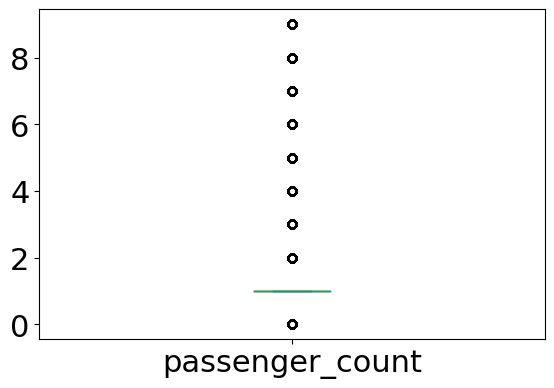

In [22]:
combine_raw[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
# plt.savefig('continuous_boxplots.pdf')

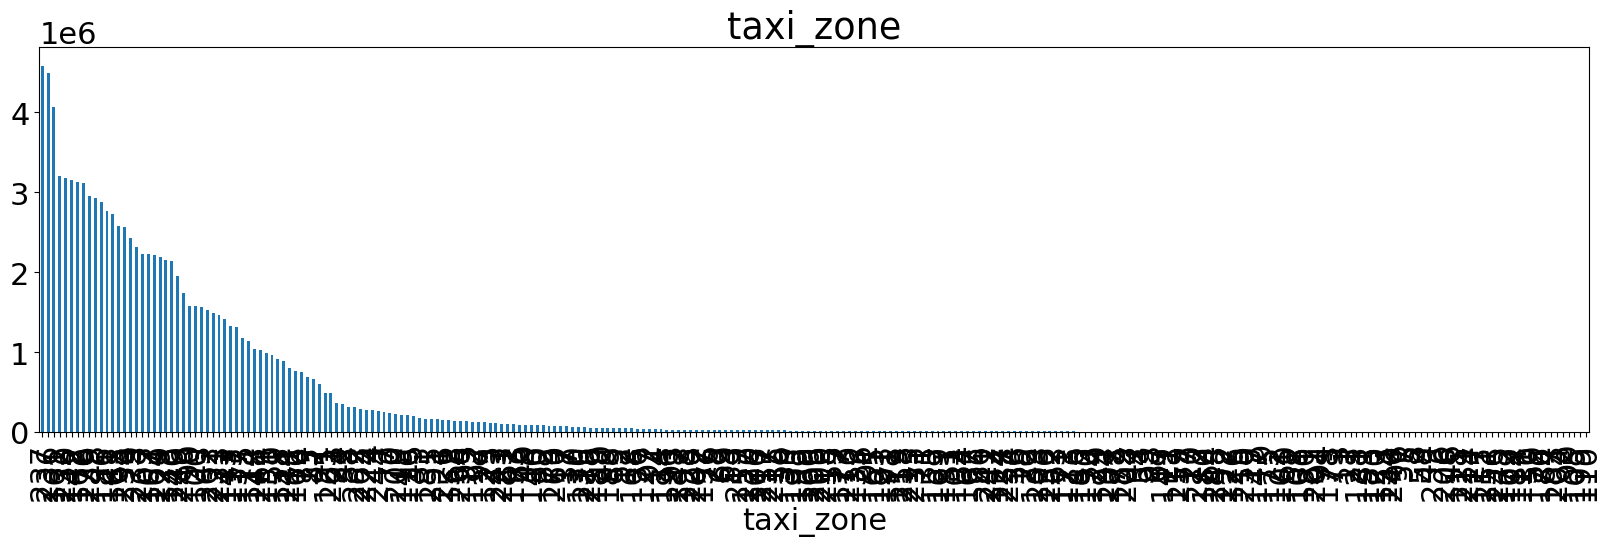

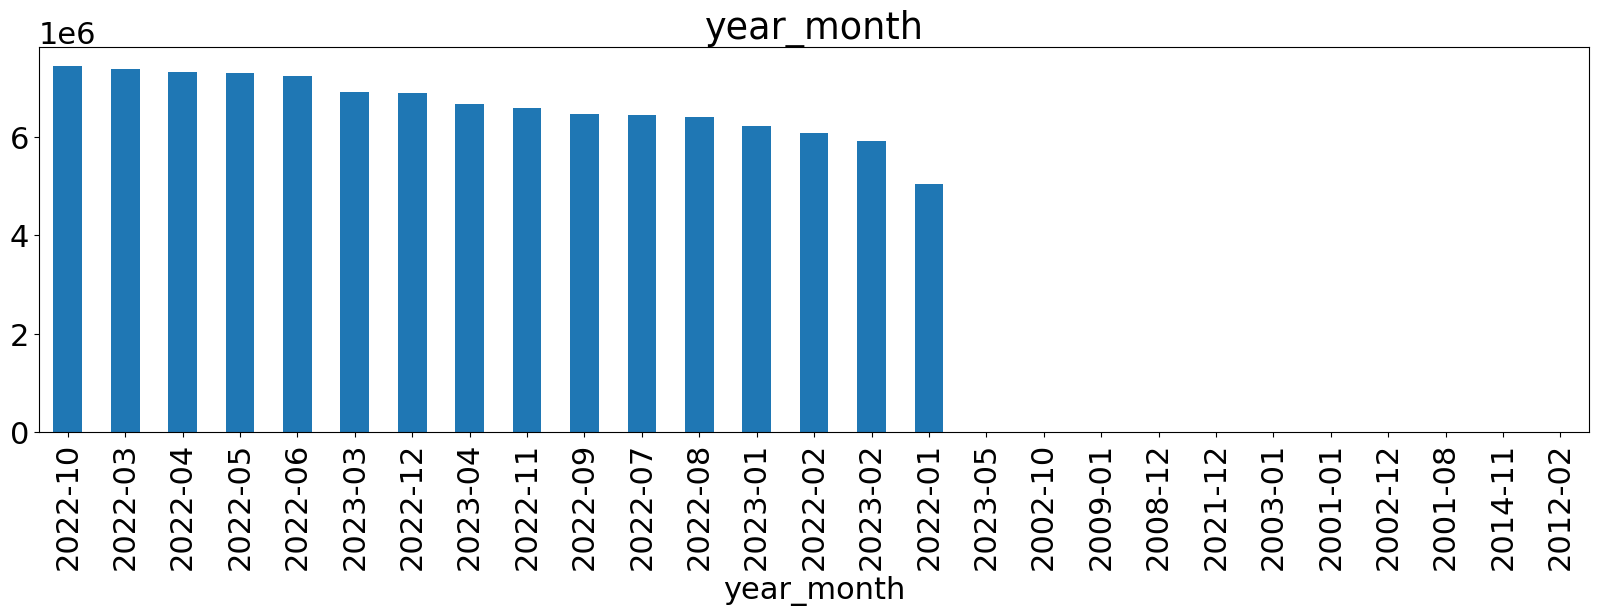

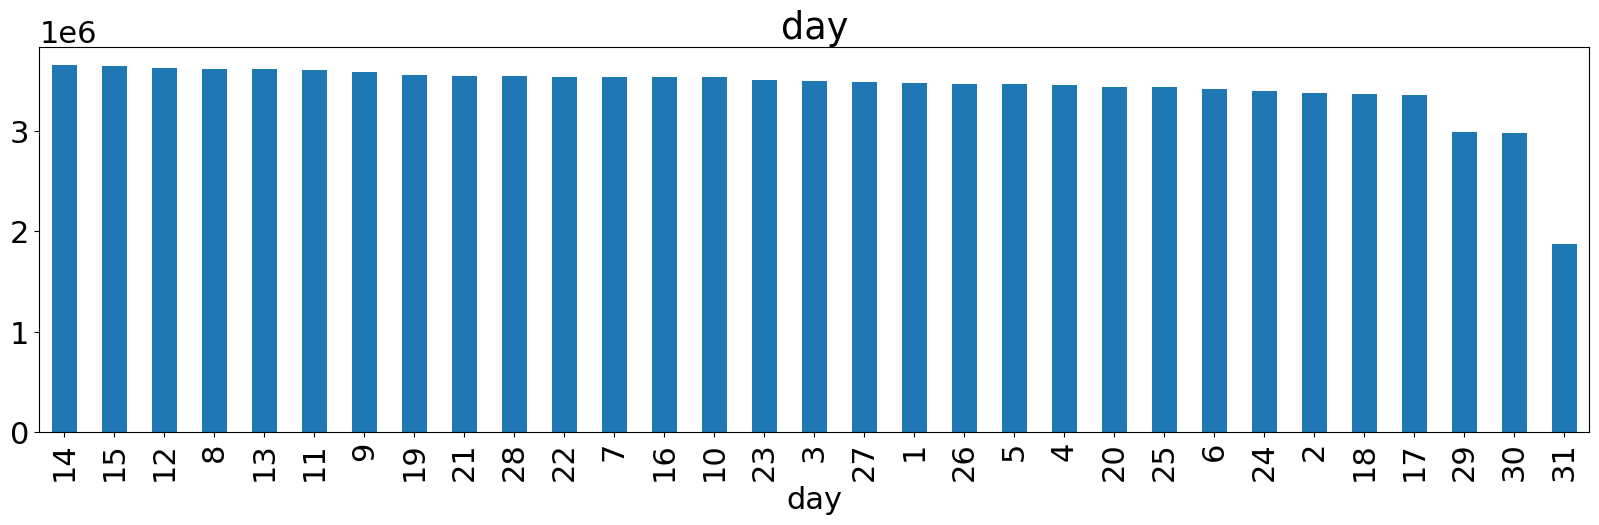

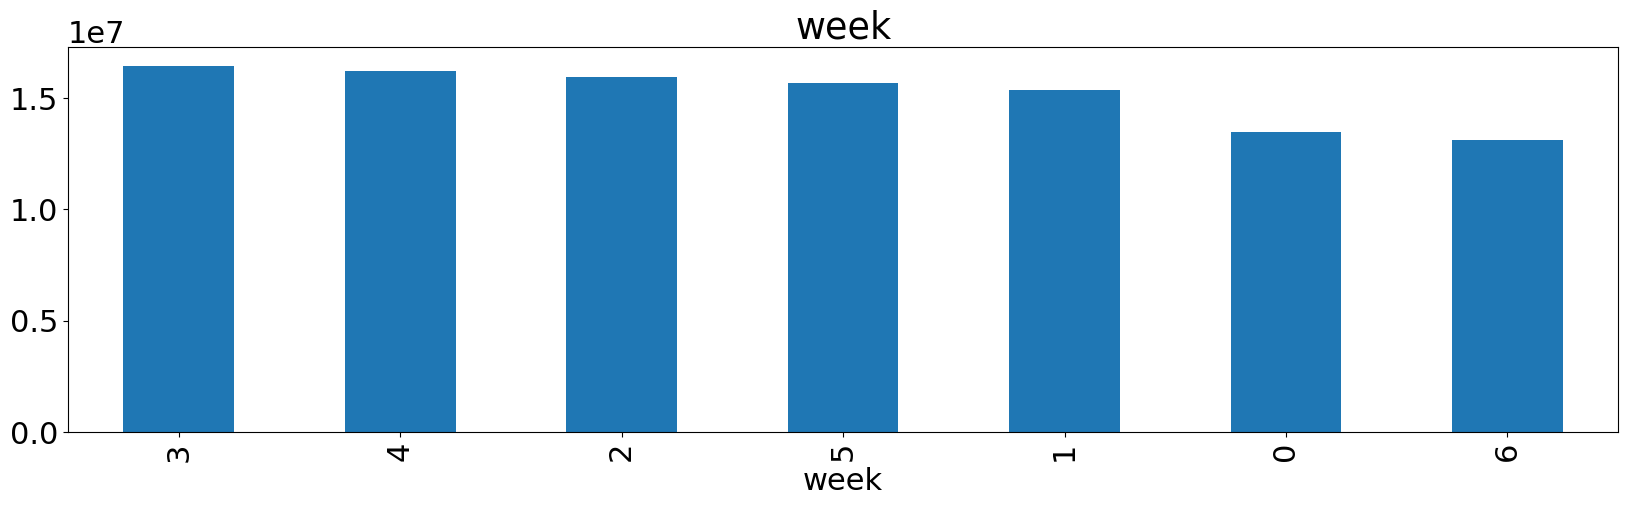

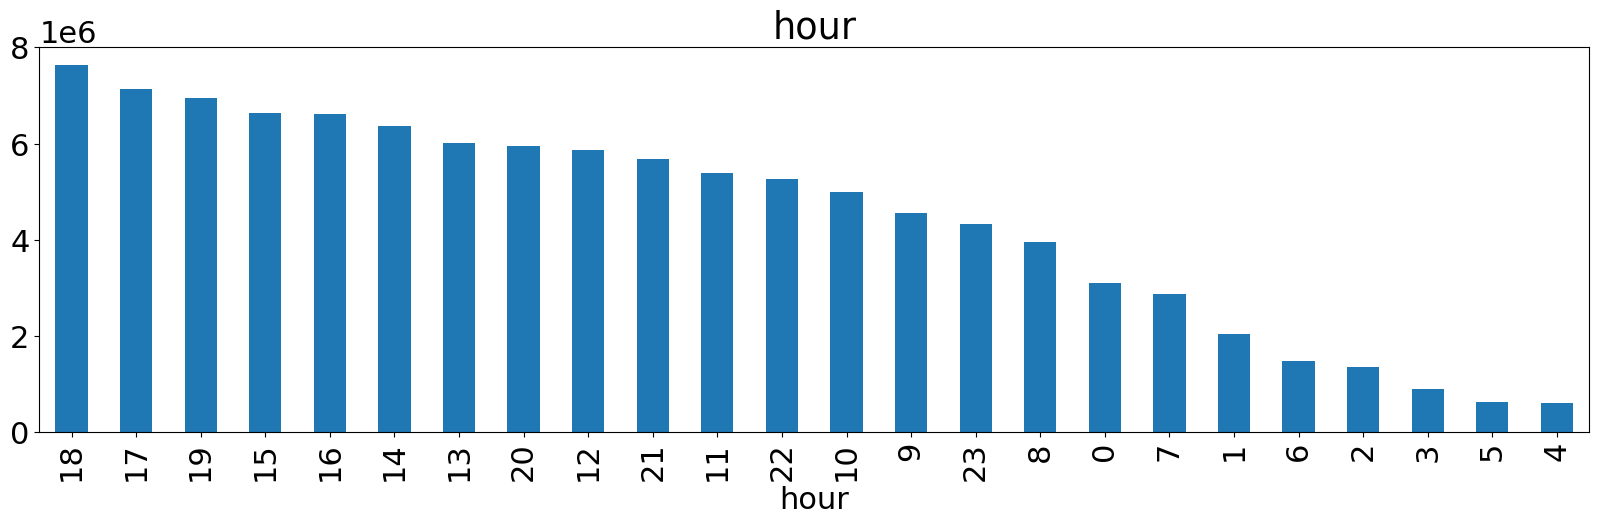

In [23]:
# Plot bar plots for all the catagorical features
for col in category_columns:
    f = combine_raw[col].value_counts().plot(kind='bar', figsize=(20,5))
    plt.title(col)
#         pp.savefig(f.get_figure())
    plt.show()

# replace the null value of passenger_count with median

In [24]:
# replace missing value with reasonable estimate -- median.
median_case_passenger_count = combine_raw['passenger_count'].median()
median_case_passenger_count
combine_raw['passenger_count'] = combine_raw['passenger_count'].replace(np.nan, median_case_passenger_count)

In [25]:
# check the missing value, make sure there is no missing value.
missing_case_passenger_count = combine_raw[combine_raw['passenger_count'].isnull()]
missing_case_passenger_count

Empty DataFrame
Columns: [datetime, passenger_count, taxi_zone, year_month, day, week, hour]
Index: []

# replace the "0" value of passenger_count with median

In [26]:
# check the rows of 0 value.
zero_value_case_passenger_count = combine_raw[combine_raw['passenger_count'] == 0]
zero_value_case_passenger_count

datetime  passenger_count taxi_zone year_month day week hour
143   2022-01-01 00:17:34              0.0       236    2022-01   1    5    0
144   2022-01-01 00:23:57              0.0       263    2022-01   1    5    0
145   2022-01-01 00:31:53              0.0       140    2022-01   1    5    0
146   2022-01-01 00:41:40              0.0       163    2022-01   1    5    0
157   2022-01-01 00:55:36              0.0       162    2022-01   1    5    0
...                   ...              ...       ...        ...  ..  ...  ...
60482 2023-04-30 17:20:44              0.0        65    2023-04  30    6   17
60514 2023-04-30 18:46:26              0.0       238    2023-04  30    6   18
60540 2023-04-30 18:49:55              0.0        97    2023-04  30    6   18
60595 2023-04-30 18:21:29              0.0        52    2023-04  30    6   18
60596 2023-04-30 18:26:49              0.0        25    2023-04  30    6   18

[1964598 rows x 7 columns]

In [27]:
combine_raw['passenger_count'] = combine_raw['passenger_count'].replace(0, median_case_passenger_count)

In [28]:
# check the rows of 0 value has been dropped.
zero_value_case_passenger_count = combine_raw[combine_raw['passenger_count'] == 0]
zero_value_case_passenger_count

Empty DataFrame
Columns: [datetime, passenger_count, taxi_zone, year_month, day, week, hour]
Index: []


# clean the rows with wrong month

In [29]:
# check the rows of month can't match.
month_list = ["2023-04", "2023-03", "2023-02", "2023-01", "2022-12", "2022-11","2022-10","2022-9", "2022-8", "2022-7",
             "2022-6","2022-5", "2022-4","2022-3","2022-2","2022-1",]
miss_match_case_month = combine_raw[~combine_raw['year_month'].isin(month_list)]

miss_match_case_month

datetime  passenger_count taxi_zone year_month day week hour
940   2021-12-31 23:52:28              1.0       238    2021-12  31    4   23
1028  2021-12-31 23:59:23              2.0        79    2021-12  31    4   23
1049  2021-12-31 23:57:54              1.0       148    2021-12  31    4   23
1290  2021-12-31 23:57:35              2.0       249    2021-12  31    4   23
1442  2021-12-31 23:58:55              1.0       137    2021-12  31    4   23
...                   ...              ...       ...        ...  ..  ...  ...
60872 2023-05-01 00:08:25              1.0        75    2023-05   1    0    0
60894 2023-05-01 00:03:12              2.0       260    2023-05   1    0    0
60901 2023-05-01 00:17:14              1.0        67    2023-05   1    0    0
60904 2023-05-01 00:13:02              1.0        73    2023-05   1    0    0
60907 2023-05-01 00:02:48              1.0       135    2023-05   1    0    0

[1890 rows x 7 columns]

In [30]:
# drop miss match value rows.
combine_raw = combine_raw.drop(miss_match_case_month.index)

In [31]:
# check the rows of month can't match.
miss_match_case_month = combine_raw[~combine_raw['year_month'].isin(month_list)]
miss_match_case_month

Empty DataFrame
Columns: [datetime, passenger_count, taxi_zone, year_month, day, week, hour]
Index: []

In [32]:
print("taxi_zone: ", combine_raw['taxi_zone'].unique().tolist(), "\n")
print("year_month: ", combine_raw['year_month'].unique().tolist(), "\n")
print("week: ", combine_raw['week'].unique().tolist(), "\n")
print("hour: ", combine_raw['hour'].unique().tolist(), "\n")
print("day: ", combine_raw['day'].unique().tolist(), "\n")
print("passenger_count: ", combine_raw['passenger_count'].unique().tolist(), "\n")

taxi_zone:  [142, 236, 166, 114, 68, 138, 233, 238, 234, 246, 43, 239, 148, 237, 7, 107, 263, 161, 79, 170, 162, 4, 262, 249, 132, 137, 90, 45, 70, 48, 211, 113, 164, 141, 50, 265, 88, 186, 144, 224, 95, 24, 158, 74, 140, 163, 75, 229, 209, 264, 219, 232, 151, 256, 231, 87, 116, 65, 188, 42, 13, 33, 41, 220, 146, 100, 261, 125, 152, 127, 143, 243, 66, 260, 181, 195, 112, 129, 10, 226, 25, 255, 244, 12, 168, 230, 189, 97, 82, 190, 52, 49, 61, 145, 223, 202, 228, 179, 36, 40, 159, 80, 17, 167, 208, 69, 254, 213, 193, 77, 37, 225, 171, 106, 93, 247, 165, 117, 212, 250, 14, 157, 198, 83, 169, 136, 217, 173, 123, 160, 3, 1, 76, 89, 22, 39, 86, 18, 28, 252, 227, 135, 91, 124, 38, 216, 119, 205, 81, 122, 194, 92, 133, 35, 134, 177, 215, 147, 248, 63, 47, 210, 197, 201, 131, 200, 56, 5, 130, 191, 85, 218, 51, 46, 149, 241, 139, 235, 71, 102, 62, 174, 72, 182, 11, 29, 183, 67, 155, 54, 196, 8, 175, 55, 53, 64, 180, 34, 60, 120, 44, 257, 78, 207, 242, 184, 153, 185, 15, 19, 26, 258, 121, 57, 203

In [33]:
combine_raw.dtypes

datetime           datetime64[ns]
passenger_count           float64
taxi_zone                category
year_month               category
day                      category
week                     category
hour                     category
dtype: object

In [34]:
combine_raw

datetime  passenger_count taxi_zone year_month day week hour
0     2022-01-01 00:35:40              2.0       142    2022-01   1    5    0
1     2022-01-01 00:33:43              1.0       236    2022-01   1    5    0
2     2022-01-01 00:53:21              1.0       166    2022-01   1    5    0
3     2022-01-01 00:25:21              1.0       114    2022-01   1    5    0
4     2022-01-01 00:36:48              1.0        68    2022-01   1    5    0
...                   ...              ...       ...        ...  ..  ...  ...
65387 2023-04-30 22:12:00              1.0       168    2023-04  30    6   22
65388 2023-04-30 23:43:00              1.0       170    2023-04  30    6   23
65389 2023-04-30 23:40:00              1.0       112    2023-04  30    6   23
65390 2023-04-30 23:57:00              1.0       236    2023-04  30    6   23
65391 2023-04-30 23:44:00              1.0        74    2023-04  30    6   23

[106195690 rows x 7 columns]

# group the passenger number together by the hour

In [35]:
# change the time into hour, ignore the minutes and seconds
combine_raw['datetime'] = combine_raw['datetime'].dt.floor('H')


In [36]:
df_grouped = combine_raw.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()

In [37]:
df_grouped

taxi_zone            datetime  passenger_count
0               1 2022-01-01 00:00:00              0.0
1               1 2022-01-01 01:00:00              0.0
2               1 2022-01-01 02:00:00              2.0
3               1 2022-01-01 03:00:00              1.0
4               1 2022-01-01 04:00:00              8.0
...           ...                 ...              ...
3061315       265 2023-04-30 19:00:00             41.0
3061316       265 2023-04-30 20:00:00             53.0
3061317       265 2023-04-30 21:00:00             45.0
3061318       265 2023-04-30 22:00:00             62.0
3061319       265 2023-04-30 23:00:00             95.0

[3061320 rows x 3 columns]

In [38]:
# Extract year and month
df_grouped['year_month'] = df_grouped['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
# df_grouped['day'] = df_grouped['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
df_grouped['week'] = df_grouped['datetime'].dt.dayofweek

# Extract hour of the day
df_grouped['hour'] = df_grouped['datetime'].dt.hour

# days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
# combine_raw['week'] = combine_raw['week'].apply(lambda x: days[x])

df_grouped



taxi_zone            datetime  passenger_count year_month  week  hour
0               1 2022-01-01 00:00:00              0.0    2022-01     5     0
1               1 2022-01-01 01:00:00              0.0    2022-01     5     1
2               1 2022-01-01 02:00:00              2.0    2022-01     5     2
3               1 2022-01-01 03:00:00              1.0    2022-01     5     3
4               1 2022-01-01 04:00:00              8.0    2022-01     5     4
...           ...                 ...              ...        ...   ...   ...
3061315       265 2023-04-30 19:00:00             41.0    2023-04     6    19
3061316       265 2023-04-30 20:00:00             53.0    2023-04     6    20
3061317       265 2023-04-30 21:00:00             45.0    2023-04     6    21
3061318       265 2023-04-30 22:00:00             62.0    2023-04     6    22
3061319       265 2023-04-30 23:00:00             95.0    2023-04     6    23

[3061320 rows x 6 columns]

# drop the taxi_zone which geojson don't have

In [39]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Read the geojson file
geo_taxi_zone = gpd.read_file('NYC Taxi Zones.geojson')
geo_taxi_zone

shape_area objectid       shape_leng location_id  \
0       0.0007823067885        1   0.116357453189           1   
1      0.00486634037837        2    0.43346966679           2   
2     0.000314414156821        3  0.0843411059012           3   
3     0.000111871946192        4  0.0435665270921           4   
4     0.000497957489363        5  0.0921464898574           5   
..                  ...      ...              ...         ...   
258   0.000168611097013      256  0.0679149669603         256   
259   0.000394552487366      259   0.126750305191         259   
260   0.000422345326907      260   0.133514154636         260   
261  0.0000343423231652      261  0.0271204563616         261   
262   0.000122330270966      262  0.0490636231541         262   

                          zone        borough  \
0               Newark Airport            EWR   
1                  Jamaica Bay         Queens   
2      Allerton/Pelham Gardens          Bronx   
3                Alphabet City      Manhattan   
4                Arden Heights  Staten Island   
..                         ...            ...   
258  Williamsburg (South Side)       Brooklyn   
259         Woodlawn/Wakefield          Bronx   
260                   Woodside         Queens   
261         World Trade Center      Manhattan   
262             Yorkville East      Manhattan   

                                              geometry  
0    MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...  
1    MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2    MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3    MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
4    MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...  
..                                                 ...  
258  MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ...  
259  MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ...  
260  MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ...  
261  MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ...  
262  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...  

[263 rows x 7 columns]

In [40]:
# Convert to int
df_grouped['taxi_zone'] = df_grouped['taxi_zone'].astype(int)
geo_taxi_zone['objectid'] = geo_taxi_zone['objectid'].astype(int)

# Values in A but not in B
diff_A_B = set(df_grouped['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print(diff_A_B)

# Values in B but not in A
diff_B_A = set(geo_taxi_zone['objectid']).difference(set(df_grouped['taxi_zone']))
print(diff_B_A)


{264, 265}
{104, 103}


In [41]:
# Drop rows where 'taxi_zone' is 264 or 265
df_grouped = df_grouped.loc[(df_grouped['taxi_zone'] != 264) & (df_grouped['taxi_zone'] != 265)]
df_grouped

taxi_zone            datetime  passenger_count year_month  week  hour
0                1 2022-01-01 00:00:00              0.0    2022-01     5     0
1                1 2022-01-01 01:00:00              0.0    2022-01     5     1
2                1 2022-01-01 02:00:00              2.0    2022-01     5     2
3                1 2022-01-01 03:00:00              1.0    2022-01     5     3
4                1 2022-01-01 04:00:00              8.0    2022-01     5     4
...            ...                 ...              ...        ...   ...   ...
3038035        263 2023-04-30 19:00:00            247.0    2023-04     6    19
3038036        263 2023-04-30 20:00:00            242.0    2023-04     6    20
3038037        263 2023-04-30 21:00:00            210.0    2023-04     6    21
3038038        263 2023-04-30 22:00:00            152.0    2023-04     6    22
3038039        263 2023-04-30 23:00:00             84.0    2023-04     6    23

[3038040 rows x 6 columns]

In [42]:
# Values in A but not in B
diff_A_B = set(df_grouped['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print(diff_A_B)

set()


# add borough feature

In [43]:
df_add_borough = df_grouped.merge(geo_taxi_zone[['objectid', 'borough']], 
                               left_on='taxi_zone', 
                               right_on='objectid', 
                               how='left')

# Now, drop the 'objectid' column if it's not needed
df_add_borough.drop('objectid', axis=1, inplace=True)


In [44]:
df_add_borough

taxi_zone            datetime  passenger_count year_month  week  \
0                1 2022-01-01 00:00:00              0.0    2022-01     5   
1                1 2022-01-01 01:00:00              0.0    2022-01     5   
2                1 2022-01-01 02:00:00              2.0    2022-01     5   
3                1 2022-01-01 03:00:00              1.0    2022-01     5   
4                1 2022-01-01 04:00:00              8.0    2022-01     5   
...            ...                 ...              ...        ...   ...   
3038035        263 2023-04-30 19:00:00            247.0    2023-04     6   
3038036        263 2023-04-30 20:00:00            242.0    2023-04     6   
3038037        263 2023-04-30 21:00:00            210.0    2023-04     6   
3038038        263 2023-04-30 22:00:00            152.0    2023-04     6   
3038039        263 2023-04-30 23:00:00             84.0    2023-04     6   

         hour    borough  
0           0        EWR  
1           1        EWR  
2           2        EWR  
3           3        EWR  
4           4        EWR  
...       ...        ...  
3038035    19  Manhattan  
3038036    20  Manhattan  
3038037    21  Manhattan  
3038038    22  Manhattan  
3038039    23  Manhattan  

[3038040 rows x 7 columns]

In [45]:
print("borough: ", df_add_borough['borough'].unique().tolist(), "\n")

borough:  ['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'] 



In [46]:
df_add_borough.reset_index(drop=True).to_parquet("basic_taxi_df_2.2.parquet", index=False)

In [47]:
df = pd.read_parquet("basic_taxi_df_2.parquet")
df

taxi_zone            datetime  passenger_count year_month  week  \
0                1 2022-01-01 00:00:00              0.0    2022-01     5   
1                1 2022-01-01 01:00:00              0.0    2022-01     5   
2                1 2022-01-01 02:00:00              2.0    2022-01     5   
3                1 2022-01-01 03:00:00              1.0    2022-01     5   
4                1 2022-01-01 04:00:00              8.0    2022-01     5   
...            ...                 ...              ...        ...   ...   
3038035        263 2023-04-30 19:00:00           2223.0    2023-04     6   
3038036        263 2023-04-30 20:00:00           2187.0    2023-04     6   
3038037        263 2023-04-30 21:00:00           1890.0    2023-04     6   
3038038        263 2023-04-30 22:00:00           1404.0    2023-04     6   
3038039        263 2023-04-30 23:00:00            756.0    2023-04     6   

         hour    borough  
0           0        EWR  
1           1        EWR  
2           2        EWR  
3           3        EWR  
4           4        EWR  
...       ...        ...  
3038035    19  Manhattan  
3038036    20  Manhattan  
3038037    21  Manhattan  
3038038    22  Manhattan  
3038039    23  Manhattan  

[3038040 rows x 7 columns]

In [48]:
pd.set_option('display.float_format', '{:.2f}'.format)

print(df['passenger_count'].describe())


count   3038040.00
mean         72.62
std         337.41
min           0.00
25%           0.00
50%           2.00
75%          18.00
max       12366.00
Name: passenger_count, dtype: float64
